<a href="https://colab.research.google.com/github/VasiliyGorovoy/my-portfolio/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_Python/%D0%94%D0%97_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%89%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будем осуществлять работу с непростым набором данных “horse_data.csv” о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов в файле “horse_data.names” , загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
"""Задание 1.
Загрузка данных Изучить представленный набор данных на основе описания его столбцов в файле “horse_data.names” ,
загрузить его и оставить 8 столбцов для дальнейшего изучения:
surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome
(операция?, возраст, ректальная температура, пульс, частота дыхания, температура конечностей, боль, результат).
  Операция?:
1 = Да, была операция
2 = Лечился без операции
  Возраст:
1 = Взрослая лошадь
2 = Молодая (< 6 месяцев)
  Ректальная температура:
- линейная
- в градусах Цельсия.
- повышенная температура может возникнуть из-за инфекции.
- температура может быть снижена, когда животное находится в позднем шоке
- нормальная температура составляет 37,8
- этот параметр обычно меняется по мере прогрессирования проблемы например, может сначала быть нормальной, затем повыситься из-за
поражения, проходя обратно через нормальный диапазон, когда лошадь впадает в шок
  Пульс:
- линейный
- частота сердечных сокращений в ударах в минуту
- отражает состояние сердца: 30-40 является нормой для взрослых
- редко бывает частота ниже нормы, хотя у спортивных лошадей может быть частота 20-25
- животные с болезненными поражениями или страдающие от циркуляторного шока могут иметь повышенную частоту сердечных сокращений
  Частота дыхания:
- линейная
- нормальная частота 8-10
- полезность сомнительна из-за больших колебаний
  Температура конечностей:
- субъективный показатель периферического кровообращения
- возможные значения:
1 = Нормальная
2 = Теплая
3 = Прохладная
4 = Холодная
- прохладные или холодные конечности указывают на возможный шок
- горячие конечности должны коррелировать с повышенной ректальной температурой
  Боль:
- субъективная оценка уровня боли лошади
- возможные значения:
1 = бдительность, боли нет
2 = подавленность
3 = прерывистая легкая боль
4 = прерывистая сильная боль
5 = постоянная сильная боль
- НЕ следует рассматривать как упорядоченную или дискретную переменную!
- В целом, чем сильнее боль, тем больше вероятность, что потребуется операция
- предшествующее лечение боли может в некоторой степени скрыть уровень боли
  Результат:
- что в итоге случилось с лошадью?
- возможные значения:
1 = жила
2 = умерла
3 = была усыплена """

import pandas as pd
import numpy as np

df = pd.read_csv('/content/horse_data.csv',
                 usecols=[0, 1, 3, 4, 5, 6, 10, 22],
                 names = ['surgery?', 'age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome'],
                 na_values='?')
"""заменим значения 9 на 2 в столбце 'age',т.к. оно не соответствует описанию значений данного столбца"""
df['age'] = df['age'].replace(9, 2)
df.head(10)

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
7,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
8,2.0,1,NaN,80.0,36.0,3.0,4.0,3.0
9,2.0,2,38.3,90.0,NaN,1.0,5.0,1.0


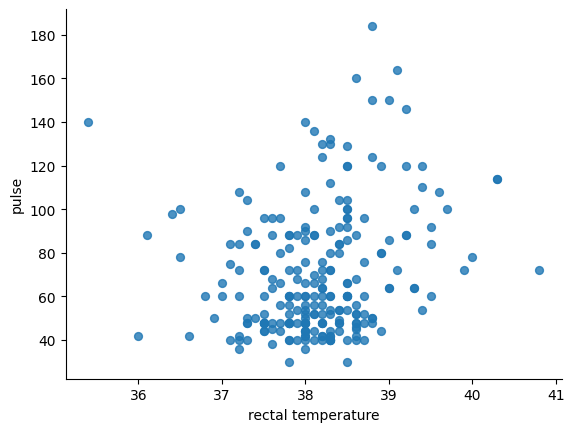

In [ ]:
# @title rectal temperature vs pulse

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='rectal temperature', y='pulse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

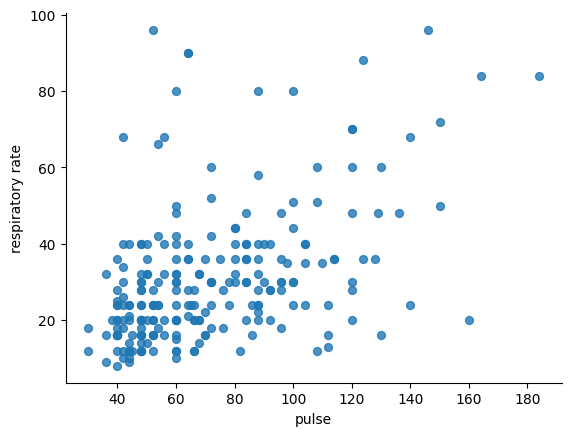

In [ ]:
# @title pulse vs respiratory rate

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pulse', y='respiratory rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
"""Задание 2.
Первичное изучение данных Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы."""

"""через моду посмотрим какие значения чаще встречаются в категориальных столбцах"""

"""получается основная часть лошадей это взрослые особи, которые выжили при лечении и им не потребовалась операция."""
for column in ('surgery?', 'age', 'temperature of extremities', 'pain', 'outcome'):
    df[column].mode()[0]
print(result_mode)

"""посчитаем количество всех значений в столбцах"""

"""Основная часть лошадей взрослые особи и большая их часть выжила при лечении.
Также видно что без операции удалось вылечить немного больше половины лошадей, при этом у большенства
конечности были прохладными, а из документации прохладные или холодные конечности указывают на возможный шок.
Болевые ущущения самых разных характеров и присутствуют почти у всех лошадей. Вообще...все эти данные...
наводят меня только на одну мысль, что причина заболевания лошадей это неправильное кормление... """

for column in ('surgery?', 'age', 'temperature of extremities', 'pain', 'outcome'):
      df[column].value_counts()
print(result_value_counts)

"""расчет статистических показателей для числовых столбцов"""
print(df[['rectal temperature','pulse','respiratory rate']].describe())


   surgery?  age  temperature of extremities  pain  outcome
0       1.0    1                         3.0   3.0      1.0
     surgery?    age  temperature of extremities  pain  outcome
1.0     180.0  276.0                        78.0    38    178.0
2.0     119.0   24.0                        30.0    59     77.0
3.0       NaN    NaN                       109.0    67     44.0
4.0       NaN    NaN                        27.0    39      NaN
5.0       NaN    NaN                         NaN    42      NaN
       rectal temperature       pulse  respiratory rate
count          240.000000  276.000000        242.000000
mean            38.167917   71.913043         30.417355
std              0.732289   28.630557         17.642231
min             35.400000   30.000000          8.000000
25%             37.800000   48.000000         18.500000
50%             38.200000   64.000000         24.500000
75%             38.500000   88.000000         36.000000
max             40.800000  184.000000         96

In [ ]:
"""находим выбросы через межквартильный размах для числовых столбцов 'rectal temperature','pulse','respiratory rate'. """
Q1 = df[['rectal temperature','pulse','respiratory rate']].quantile(0.25)
Q3 = df[['rectal temperature','pulse','respiratory rate']].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


print(IQR,lower_bound,upper_bound)

rectal temperature     0.7
pulse                 40.0
respiratory rate      17.5
dtype: float64 rectal temperature    36.75
pulse                -12.00
respiratory rate      -7.75
dtype: float64 rectal temperature     39.55
pulse                 148.00
respiratory rate       62.25
dtype: float64


In [ ]:
"""Задание 3.
Работа с пропусками Рассчитать количество пропусков для всех выбранных столбцов.
Принять и обосновать решение о методе заполнения пропусков по каждому столбцу
на основе рассчитанных статистик и возможной взаимосвязи значений в них.
Сформировать датафрейм, в котором пропуски будут отсутствовать."""


"""посчитаем количество пропусков"""
df.isnull().sum()


,0
surgery?,1
age,0
rectal temperature,60
pulse,24
respiratory rate,58
temperature of extremities,56
pain,55
outcome,1


In [ ]:
"""заполняем пропуски и создаем новый датафрейм"""

df_copy = df.copy()

"""категориальные столбцы 'surgery?', 'age', 'temperature of extremities', 'pain', 'outcome' заполняем через моду"""
df_copy['temperature of extremities'] = df_copy['temperature of extremities'].fillna(df_copy['temperature of extremities'].mode()[0])
df_copy['outcome'] = df_copy['outcome'].fillna(df_copy['outcome'].mode()[0])
df_copy['pain'] = df_copy['pain'].fillna(df_copy['pain'].mode()[0])
df_copy['surgery?'] = df_copy['surgery?'].fillna(df_copy['surgery?'].mode()[0])
df_copy['age'] = df_copy['age'].fillna(df_copy['age'].mode()[0])

"""для столбца 'rectal temperature', поскольку квартильный размах небольшой, заполним пропуски средним
арифметическим. А вот для столбцов 'pulse','respiratory rate' размах довольно большой, я предпочел
заполнить пропуски медианой"""
df_copy['rectal temperature'] = df_copy['rectal temperature'].fillna(df_copy['rectal temperature'].mean())
df_copy['pulse'] = df_copy['pulse'].fillna(df_copy['pulse'].median())
df_copy['respiratory rate'] = df_copy['respiratory rate'].fillna(df_copy['respiratory rate'].median())

df_copy.head(10)

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.500000,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.200000,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.300000,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.100000,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.300000,104.0,35.0,3.0,3.0,2.0
5,2.0,1,38.167917,64.0,24.5,2.0,2.0,1.0
6,1.0,1,37.900000,48.0,16.0,1.0,3.0,1.0
7,1.0,1,38.167917,60.0,24.5,3.0,3.0,2.0
8,2.0,1,38.167917,80.0,36.0,3.0,4.0,3.0
9,2.0,2,38.300000,90.0,24.5,1.0,5.0,1.0


In [ ]:
"""проверим насколько сильно изменились статистические показатели и как заполнились пропуски"""
for column in ('surgery?', 'age', 'temperature of extremities', 'pain', 'outcome'):
    df_copy[column].mode()[0]
print(result_mode)

for column in ('surgery?', 'age', 'temperature of extremities', 'pain', 'outcome'):
      df_copy[column].value_counts()
print(result_value_counts)

print(df_copy[['rectal temperature','pulse','respiratory rate']].describe())
"""статистические показатель сильно не изменились"""
df_copy.isnull().sum()

   surgery?  age  temperature of extremities  pain  outcome
0       1.0    1                         3.0   3.0      1.0
     surgery?    age  temperature of extremities  pain  outcome
1.0     180.0  276.0                        78.0    38    178.0
2.0     119.0   24.0                        30.0    59     77.0
3.0       NaN    NaN                       109.0    67     44.0
4.0       NaN    NaN                        27.0    39      NaN
5.0       NaN    NaN                         NaN    42      NaN
       rectal temperature       pulse  respiratory rate
count          300.000000  300.000000        300.000000
mean            38.167917   71.280000         29.273333
std              0.654705   27.541545         16.010979
min             35.400000   30.000000          8.000000
25%             37.900000   48.000000         20.000000
50%             38.167917   64.000000         24.500000
75%             38.500000   88.000000         34.250000
max             40.800000  184.000000         96

,0
surgery?,0
age,0
rectal temperature,0
pulse,0
respiratory rate,0
temperature of extremities,0
pain,0
outcome,0
